# Correlation Project // Oguzcan Kervanci

Data Source: https://www.kaggle.com/datasets/danielgrijalvas/movies

In [102]:
# import libraries 

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the configuration of the plots we will create

In [103]:
# Set the display option for float formatting
pd.set_option('display.float_format', '{:.1f}'.format)

In [104]:
# read in the data

df = pd.read_csv("Desktop/data projects 2024/python/movie_industry/movies.csv")

In [105]:
# check the first few rows of the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Missing Data Investigation

In [106]:
# Missing Data Observation
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [107]:
## show the missings in percentage 
(df.isnull().sum() / len(df)) * 100

name        0.0
rating      1.0
genre       0.0
year        0.0
released    0.0
score       0.0
votes       0.0
director    0.0
writer      0.0
star        0.0
country     0.0
budget     28.3
gross       2.5
company     0.2
runtime     0.1
dtype: float64

In [108]:
# check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Data Cleaning

In [109]:
# change data type of columns
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [110]:
df['released'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format = '%B %d, %Y')

#Uses regular expression (r'(\w+ \d+, \d+)') to extract date-like strings from the 'released' column.
#Converts the extracted strings to datetime format using pd.to_datetime.
#Assigns the resulting datetime values back to the 'released' column in the DataFrame.
#The specified format %B %d, %Y indicates the expected structure of the date strings, where %B is the full month name, %d is the day of the month, and %Y is the four-digit year.

In [111]:
df['yearcorrect'] = df['released'].astype(str).str[0:4]

In [112]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,1990-01-26,4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,1989-04-14,5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,1989-04-07,6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,1990-01-13,7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [113]:
# Drop any duplicates
df = df.drop_duplicates()

## Correlation Check

In [114]:
# Budget high correlation
# Comapny high correlation

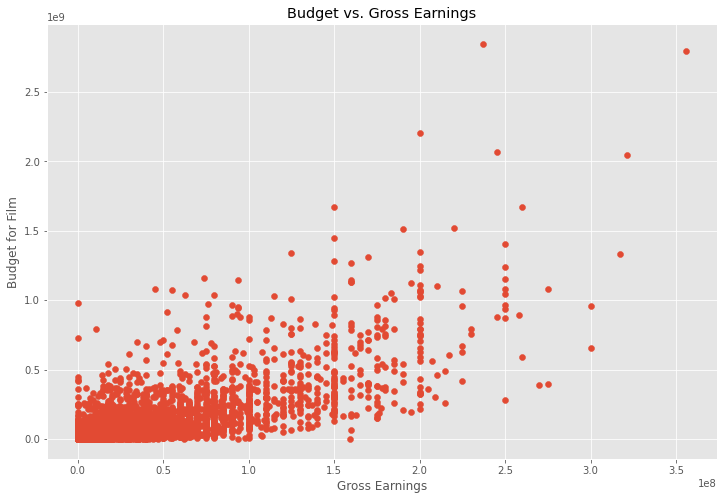

In [115]:
# Scatter plot ( budget vs. gross )

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

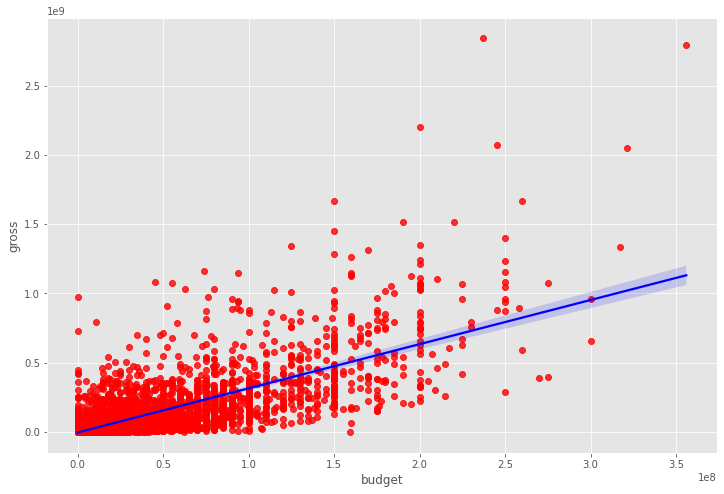

In [120]:
# Plot budget vs. gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [153]:
# Let's start looking at correlation

In [154]:
# Set the display option for float formatting
pd.set_option('display.float_format', '{:.2f}'.format)

In [155]:
df.corr(method='pearson') # pearson, kenadall, spearman...

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.00,-0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.01,-0.01,0.02,0.01,0.01,0.01,0.01
rating,-0.01,1.00,0.07,0.01,-0.00,0.03,0.02,-0.01,0.01,0.08,-0.08,-0.10,-0.03,0.06,0.01
genre,0.02,0.07,1.00,-0.08,0.03,-0.15,-0.02,0.01,-0.01,-0.04,-0.33,-0.23,-0.07,-0.05,-0.06
year,0.01,0.01,-0.08,1.00,0.10,0.22,-0.02,-0.01,-0.03,-0.07,0.31,0.26,-0.01,0.12,0.97
score,0.02,-0.00,0.03,0.10,1.00,0.41,0.01,0.02,-0.00,-0.13,0.06,0.19,0.00,0.40,0.11
votes,0.01,0.03,-0.15,0.22,0.41,1.00,0.00,0.00,-0.02,0.07,0.49,0.63,0.13,0.31,0.21
director,0.01,0.02,-0.02,-0.02,0.01,0.00,1.00,0.30,0.04,0.02,0.00,-0.01,0.00,0.02,-0.02
writer,0.01,-0.01,0.01,-0.01,0.02,0.00,0.30,1.00,0.03,0.02,-0.03,-0.02,0.01,-0.00,-0.01
star,0.01,0.01,-0.01,-0.03,-0.00,-0.02,0.04,0.03,1.00,-0.01,-0.02,-0.00,0.01,0.01,-0.03
country,-0.01,0.08,-0.04,-0.07,-0.13,0.07,0.02,0.02,-0.01,1.00,0.13,0.10,0.10,-0.08,-0.09


In [156]:
# High correlation between budget and gross

In [157]:
correlation_matrix = df.corr(method='pearson')

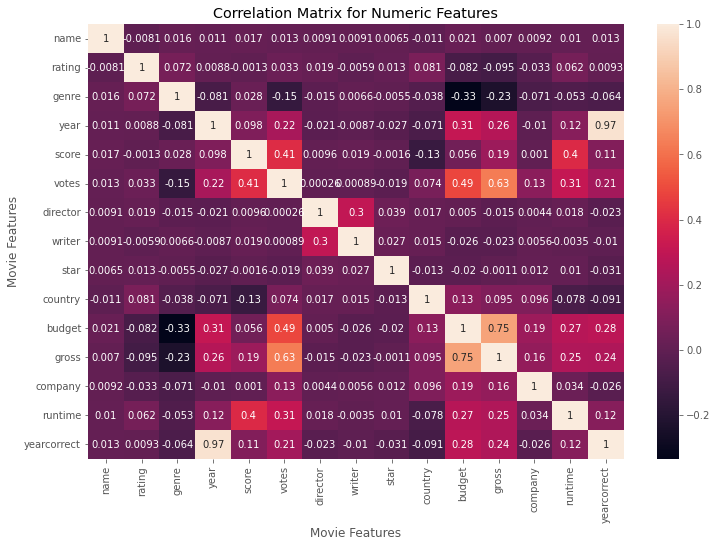

In [158]:
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [159]:
# Look at Company

# Numerize the company column

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [160]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1980-06-13,8.40,927000.00,2589,4014,1047,54,19000000,46998772,2319,146.00,0
1,5573,6,1,1980,1980-07-02,5.80,65000.00,2269,1632,327,55,4500000,58853106,731,104.00,0
2,5142,4,0,1980,1980-06-20,8.70,1200000.00,1111,2567,1745,55,18000000,538375067,1540,124.00,0
3,286,4,4,1980,1980-07-02,7.70,221000.00,1301,2000,2246,55,3500000,83453539,1812,88.00,0
4,1027,6,4,1980,1980-07-25,7.30,108000.00,1054,521,410,55,6000000,39846344,1777,98.00,0


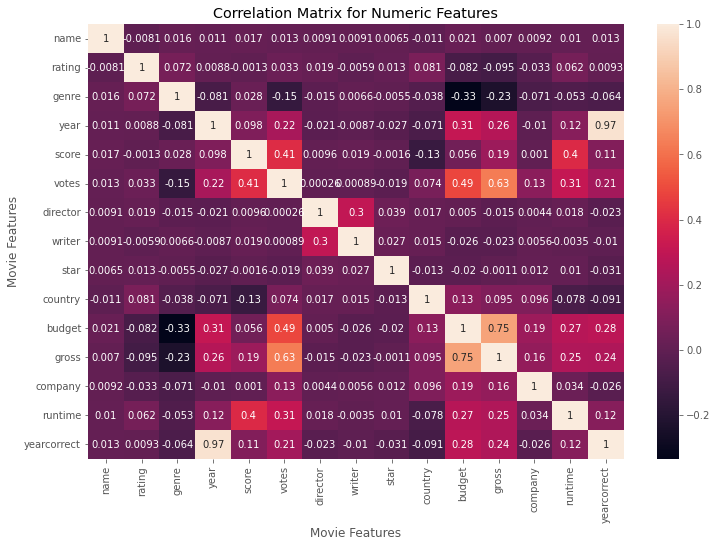

In [161]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [162]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.00,-0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.01,-0.01,0.02,0.01,0.01,0.01,0.01
rating,-0.01,1.00,0.07,0.01,-0.00,0.03,0.02,-0.01,0.01,0.08,-0.08,-0.10,-0.03,0.06,0.01
genre,0.02,0.07,1.00,-0.08,0.03,-0.15,-0.02,0.01,-0.01,-0.04,-0.33,-0.23,-0.07,-0.05,-0.06
year,0.01,0.01,-0.08,1.00,0.10,0.22,-0.02,-0.01,-0.03,-0.07,0.31,0.26,-0.01,0.12,0.97
score,0.02,-0.00,0.03,0.10,1.00,0.41,0.01,0.02,-0.00,-0.13,0.06,0.19,0.00,0.40,0.11
votes,0.01,0.03,-0.15,0.22,0.41,1.00,0.00,0.00,-0.02,0.07,0.49,0.63,0.13,0.31,0.21
director,0.01,0.02,-0.02,-0.02,0.01,0.00,1.00,0.30,0.04,0.02,0.00,-0.01,0.00,0.02,-0.02
writer,0.01,-0.01,0.01,-0.01,0.02,0.00,0.30,1.00,0.03,0.02,-0.03,-0.02,0.01,-0.00,-0.01
star,0.01,0.01,-0.01,-0.03,-0.00,-0.02,0.04,0.03,1.00,-0.01,-0.02,-0.00,0.01,0.01,-0.03
country,-0.01,0.08,-0.04,-0.07,-0.13,0.07,0.02,0.02,-0.01,1.00,0.13,0.10,0.10,-0.08,-0.09


In [163]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

In [164]:
corr_pairs

name         name           1.00
             rating        -0.01
             genre          0.02
             year           0.01
             score          0.02
                            ... 
yearcorrect  budget         0.28
             gross          0.24
             company       -0.03
             runtime        0.12
             yearcorrect    1.00
Length: 225, dtype: float64

In [165]:
sorted_pairs = corr_pairs.sort_values()

In [166]:
sorted_pairs

genre        budget        -0.33
budget       genre         -0.33
gross        genre         -0.23
genre        gross         -0.23
             votes         -0.15
                            ... 
year         year           1.00
genre        genre          1.00
rating       rating         1.00
runtime      runtime        1.00
yearcorrect  yearcorrect    1.00
Length: 225, dtype: float64

In [167]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]

In [168]:
high_corr

votes        gross         0.63
gross        votes         0.63
budget       gross         0.75
gross        budget        0.75
yearcorrect  year          0.97
year         yearcorrect   0.97
name         name          1.00
writer       writer        1.00
company      company       1.00
gross        gross         1.00
budget       budget        1.00
country      country       1.00
star         star          1.00
director     director      1.00
votes        votes         1.00
score        score         1.00
year         year          1.00
genre        genre         1.00
rating       rating        1.00
runtime      runtime       1.00
yearcorrect  yearcorrect   1.00
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings
# Company has low correlation